<a href="https://colab.research.google.com/github/zhar121/disseration-team-rep/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
!gdown 1GWqF6DLz6f9PR0mKg5h6kjbFBv2lHPFw
data = pd.read_csv('final_df.csv')

Downloading...
From: https://drive.google.com/uc?id=1GWqF6DLz6f9PR0mKg5h6kjbFBv2lHPFw
To: /content/final_df.csv
100% 15.2M/15.2M [00:00<00:00, 52.4MB/s]


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
print(data.head())
print(data.info())
print(data.describe())

                                paperId                            questionId  \
0  bc7a123c-daaa-405e-a04d-c09d895232c9  9405ae69-868d-49c1-9d38-58cddc2fc891   
1  bc7a123c-daaa-405e-a04d-c09d895232c9  78372e74-b56b-4ae1-baaf-c03da5c0bc77   
2  bc7a123c-daaa-405e-a04d-c09d895232c9  5308137a-b32a-4df9-808c-d58b487293ff   
3  bc7a123c-daaa-405e-a04d-c09d895232c9  768dcdd6-d972-41f6-a52b-b67aa4b8da71   
4  bc7a123c-daaa-405e-a04d-c09d895232c9  2fe0e7e3-92b3-41fb-8d60-53f183d085b8   

                            candidateId                         answerSheetId  \
0  0005c95f-814b-4117-8065-f25c33f1e712  6bbfed12-f0f6-4398-8afd-d458341fba3f   
1  0005c95f-814b-4117-8065-f25c33f1e712  6bbfed12-f0f6-4398-8afd-d458341fba3f   
2  0005c95f-814b-4117-8065-f25c33f1e712  6bbfed12-f0f6-4398-8afd-d458341fba3f   
3  0005c95f-814b-4117-8065-f25c33f1e712  6bbfed12-f0f6-4398-8afd-d458341fba3f   
4  0005c95f-814b-4117-8065-f25c33f1e712  6bbfed12-f0f6-4398-8afd-d458341fba3f   

   answer_score  maxScore 

In [4]:
data = data.drop_duplicates()

In [5]:
data.shape

(60514, 15)

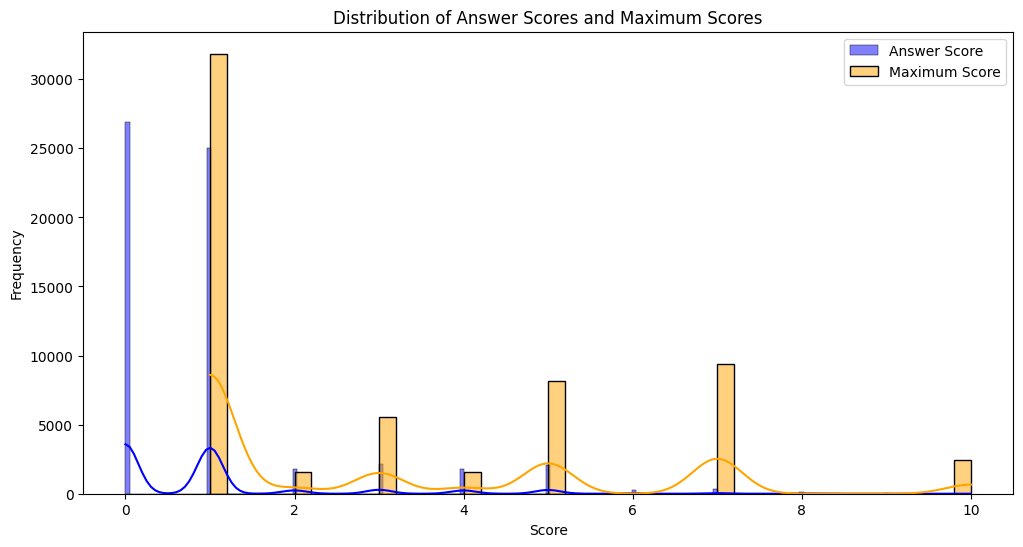

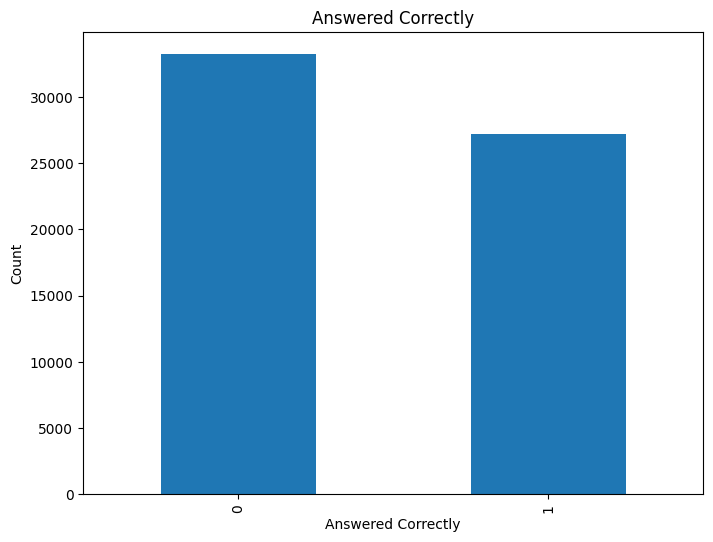

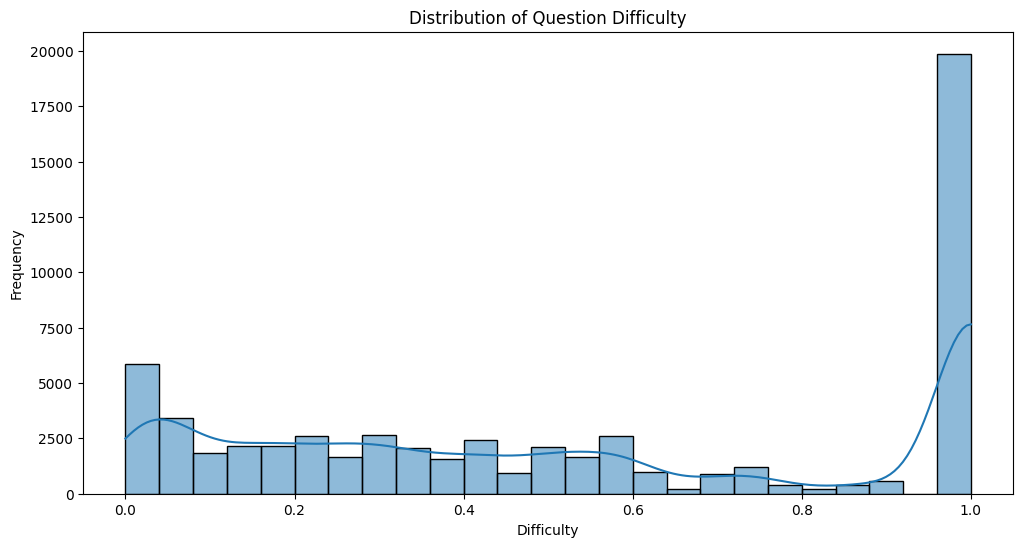

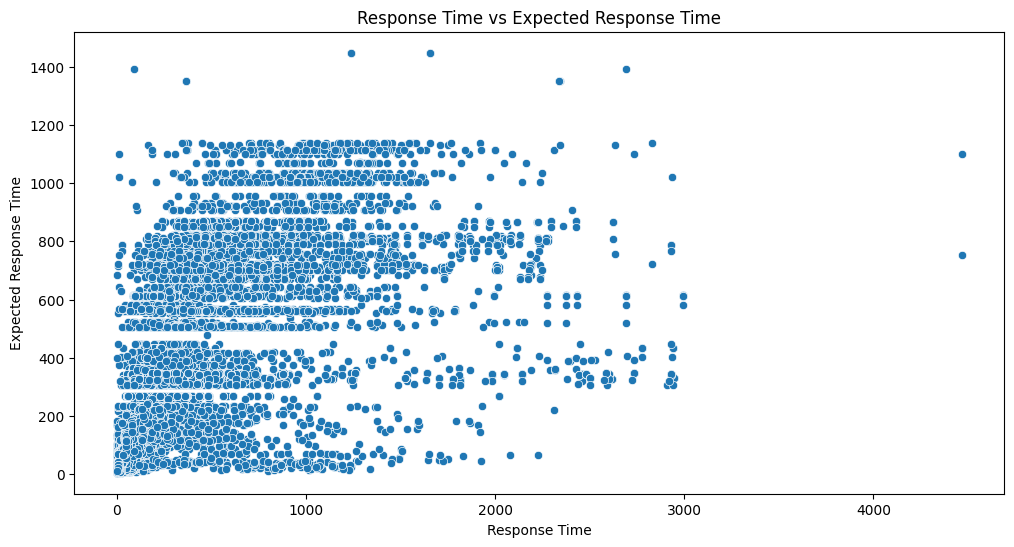

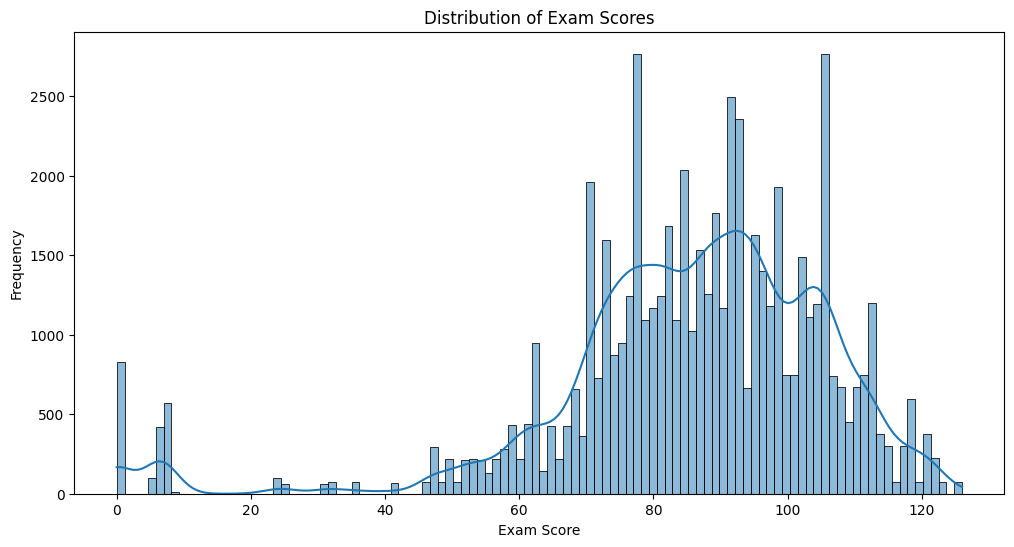

In [6]:
# analyse 'answer_score' and 'maxScore'
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data['answer_score'], kde=True, label='Answer Score', color='blue')
sns.histplot(data['maxScore'], kde=True, label='Maximum Score', color='orange')
plt.title('Distribution of Answer Scores and Maximum Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# analyse 'answeredCorrectly'
plt.figure(figsize=(8, 6))
data['answeredCorrectly'].value_counts().plot(kind='bar')
plt.title('Answered Correctly')
plt.xlabel('Answered Correctly')
plt.ylabel('Count')
plt.show()

# analyse 'Difficulty'
plt.figure(figsize=(12, 6))
sns.histplot(data['Difficulty'], kde=True)
plt.title('Distribution of Question Difficulty')
plt.xlabel('Difficulty')
plt.ylabel('Frequency')
plt.show()

# analyse 'ResponseTime' 和 'Expected response time'
plt.figure(figsize=(12, 6))
sns.scatterplot(x='ResponseTime', y='Expected response time', data=data)
plt.title('Response Time vs Expected Response Time')
plt.xlabel('Response Time')
plt.ylabel('Expected Response Time')
plt.show()

# analyse 'ExamScore'
plt.figure(figsize=(12, 6))
sns.histplot(data['ExamScore'], kde=True)
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

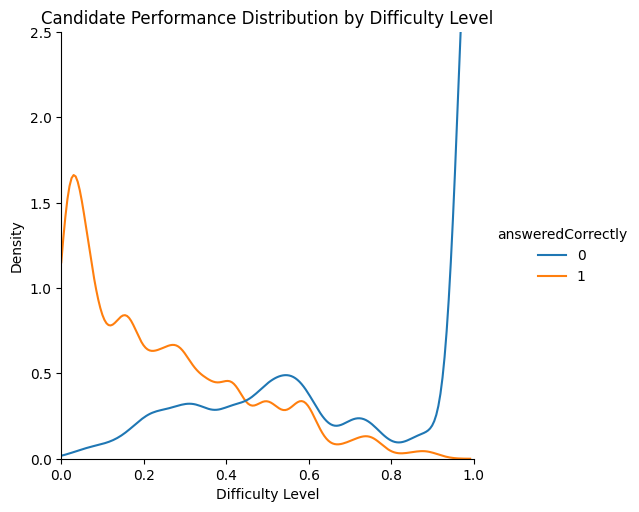

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

x_limits = (0, 1)

sns.displot(data=data, x="Difficulty", hue="answeredCorrectly", kind="kde", clip=(0, 1))
plt.title("Candidate Performance Distribution by Difficulty Level")
plt.xlabel("Difficulty Level")
plt.ylabel("Density")
plt.xlim(x_limits)
plt.ylim(0, 2.5)
plt.show()

       ResponseTime  Expected response time
count  60514.000000            60514.000000
mean     136.717338              137.700427
std      275.864792              207.125430
min        0.043000                5.137000
25%       17.666500               26.938000
50%       39.899000               42.135000
75%      128.118750              156.422000
max     4468.680000             1448.156000


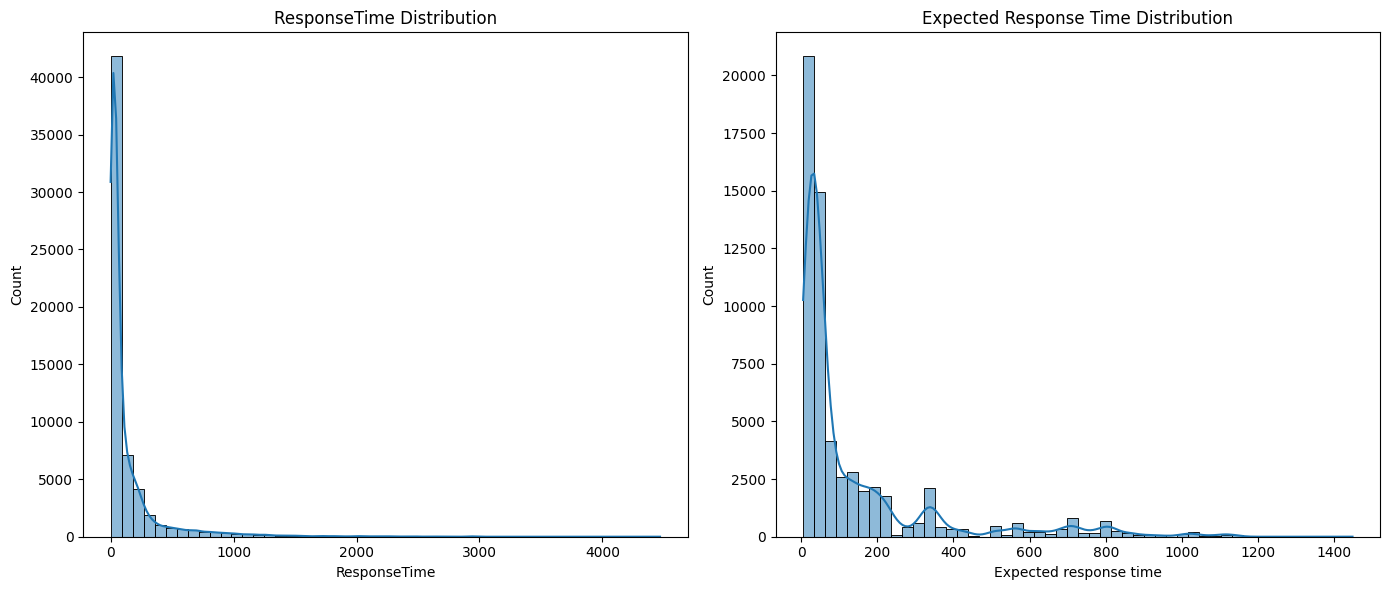

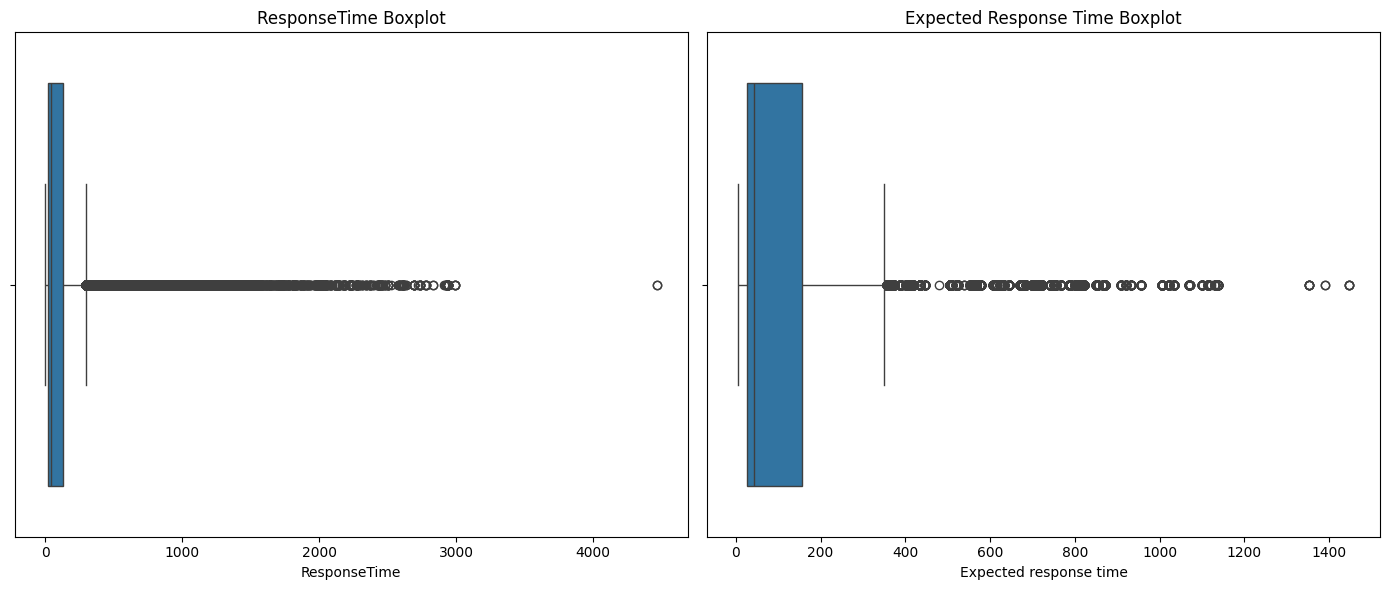

Correlation matrix:
                        ResponseTime  Expected response time
ResponseTime                1.000000                0.750514
Expected response time      0.750514                1.000000


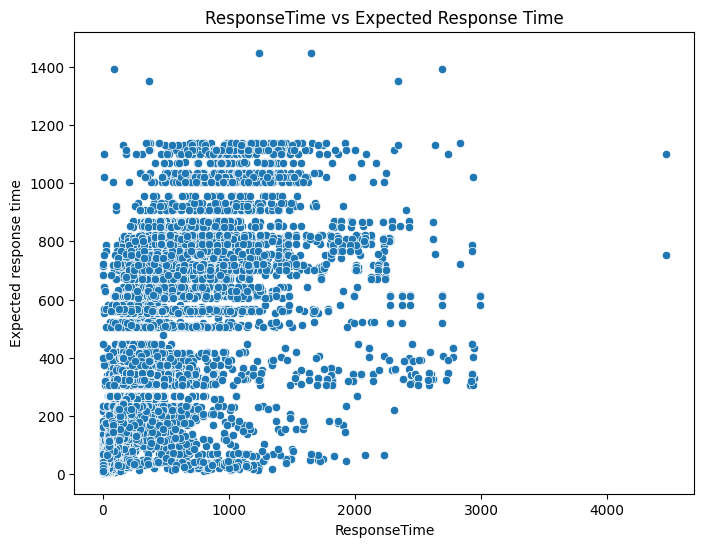

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = data


df_clean = df.dropna(subset=['ResponseTime', 'Expected response time'])

print(df_clean[['ResponseTime', 'Expected response time']].describe())

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_clean['ResponseTime'], bins=50, kde=True)
plt.title('ResponseTime Distribution')
plt.xlabel('ResponseTime')

plt.subplot(1, 2, 2)
sns.histplot(df_clean['Expected response time'], bins=50, kde=True)
plt.title('Expected Response Time Distribution')
plt.xlabel('Expected response time')

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df_clean['ResponseTime'])
plt.title('ResponseTime Boxplot')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_clean['Expected response time'])
plt.title('Expected Response Time Boxplot')

plt.tight_layout()
plt.show()

correlation = df_clean[['ResponseTime', 'Expected response time']].corr()
print('Correlation matrix:')
print(correlation)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='ResponseTime', y='Expected response time', data=df_clean)
plt.title('ResponseTime vs Expected Response Time')
plt.xlabel('ResponseTime')
plt.ylabel('Expected response time')
plt.show()

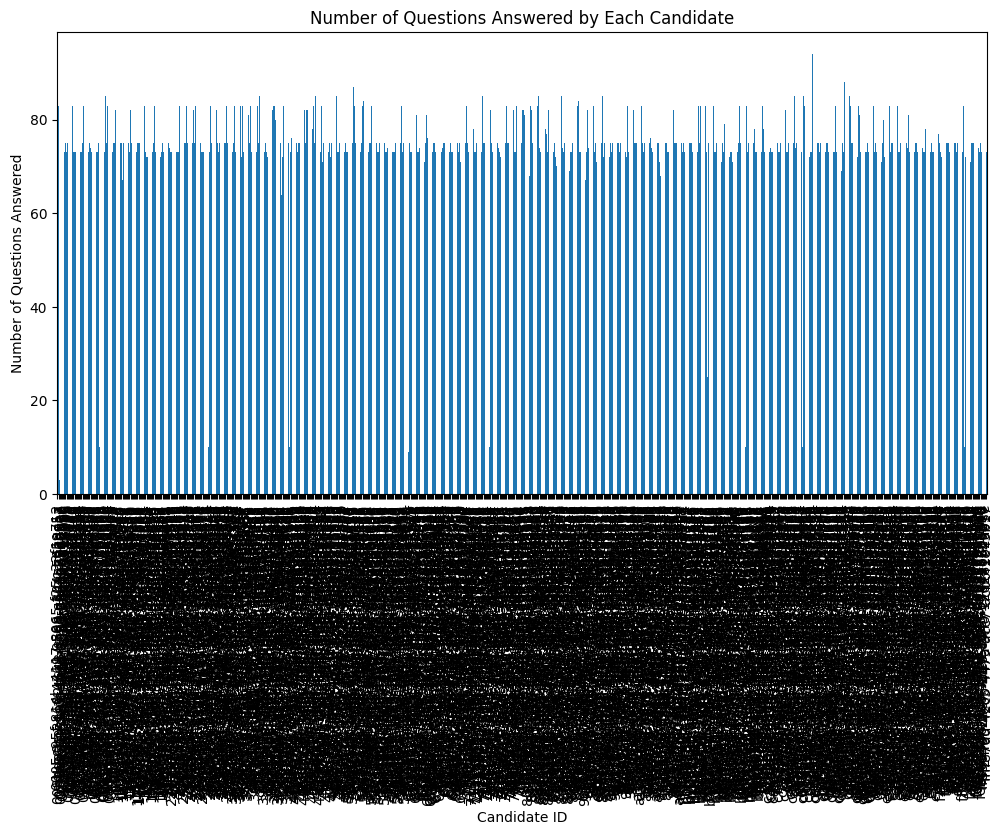

In [9]:
# Count the number of questions answered by each candidate
question_counts = data.groupby('candidateId')['questionId'].count()

plt.figure(figsize=(12, 6))
question_counts.plot(kind='bar')
plt.title('Number of Questions Answered by Each Candidate')
plt.xlabel('Candidate ID')
plt.ylabel('Number of Questions Answered')
plt.xticks(rotation=90)
plt.show()


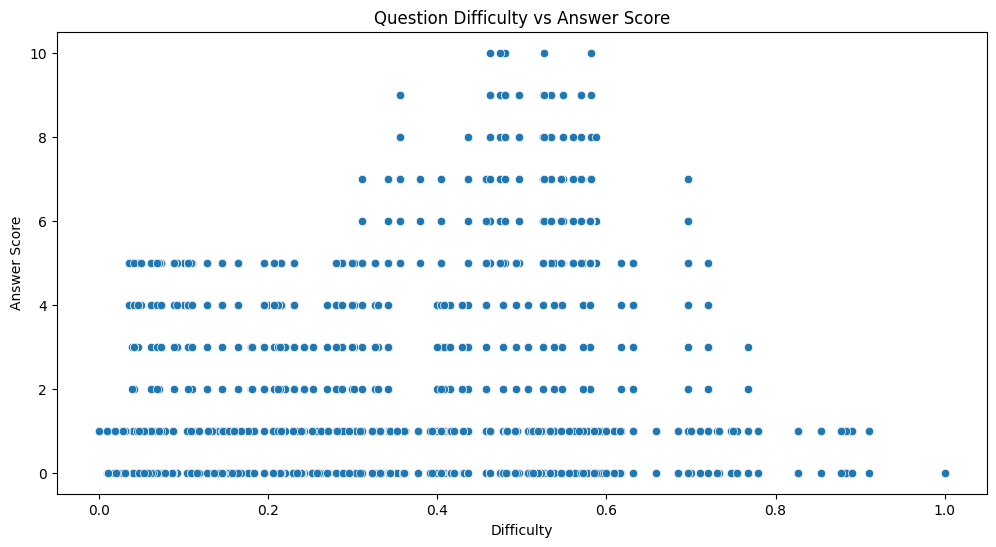

In [10]:
# Plot the scatter plot of question difficulty and answer score
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Difficulty', y='answer_score', data=data)
plt.title('Question Difficulty vs Answer Score')
plt.xlabel('Difficulty')
plt.ylabel('Answer Score')
plt.show()


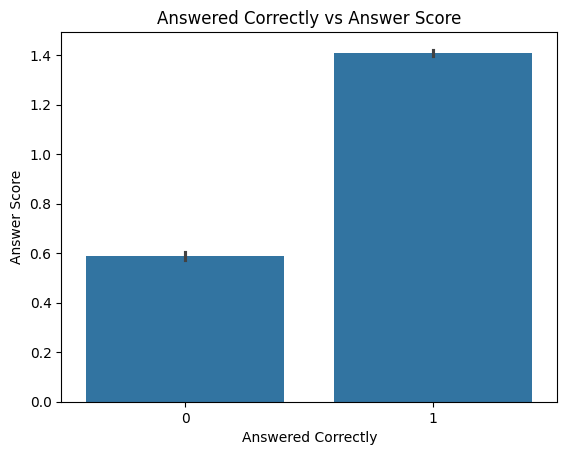

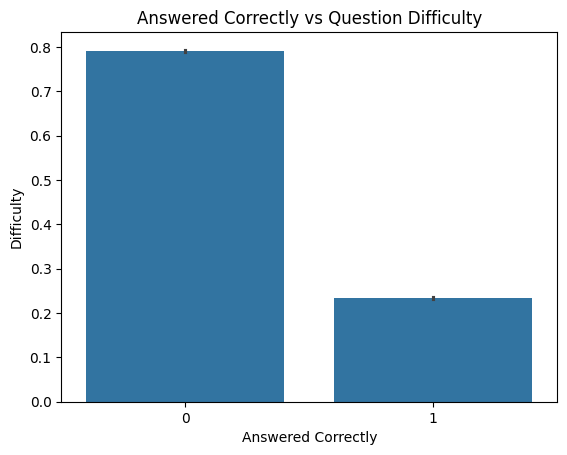

In [11]:
# Examine the relationship between answered correctly and other variables

sns.barplot(x='answeredCorrectly', y='answer_score', data=data)
plt.title('Answered Correctly vs Answer Score')
plt.xlabel('Answered Correctly')
plt.ylabel('Answer Score')
plt.show()


sns.barplot(x='answeredCorrectly', y='Difficulty', data=data)
plt.title('Answered Correctly vs Question Difficulty')
plt.xlabel('Answered Correctly')
plt.ylabel('Difficulty')
plt.show()

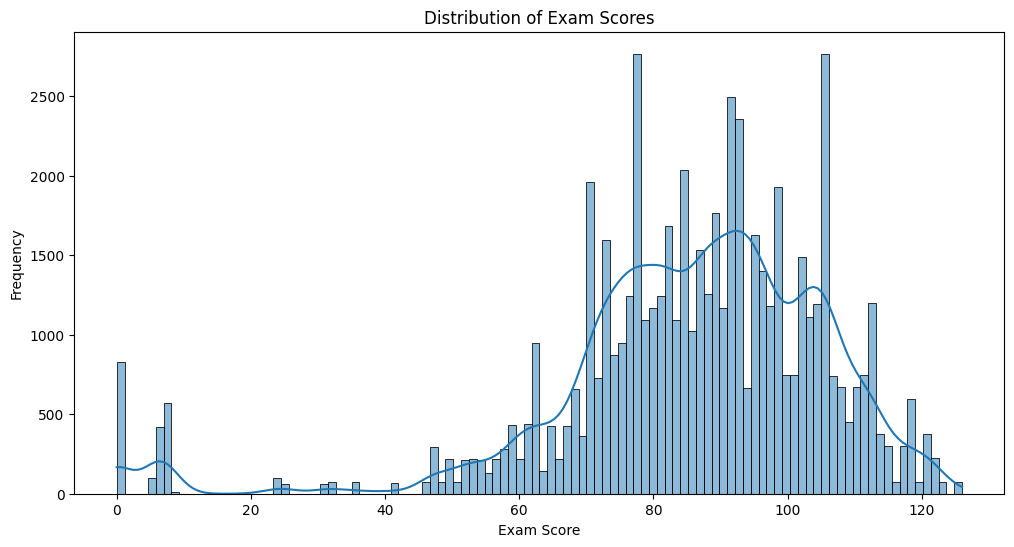

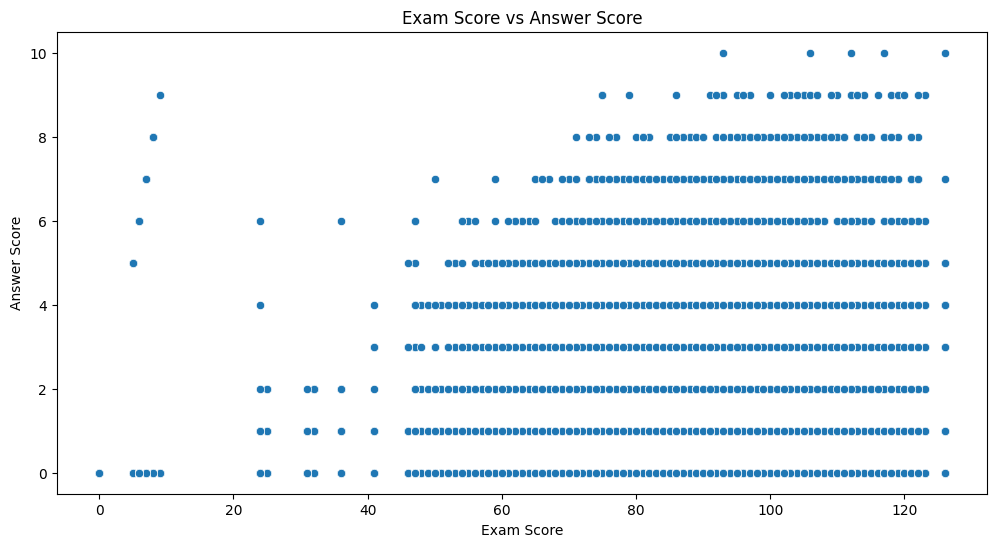

In [12]:
# Plot the distribution of exam scores
plt.figure(figsize=(12, 6))
sns.histplot(data['ExamScore'], kde=True)
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

# Analyze the relationship between exam score and other variables
plt.figure(figsize=(12, 6))
sns.scatterplot(x='ExamScore', y='answer_score', data=data)
plt.title('Exam Score vs Answer Score')
plt.xlabel('Exam Score')
plt.ylabel('Answer Score')
plt.show()